In [2]:
# Визуализировать распределение времени жизни авторов в зависимости от страны
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dt_parse(x):  # standard parser does not work due to its ranges
    if x == "nan":
        return "nan"
    year, month, day = x.split('-')
    return pd.Period(
        year=int(year),
        month=int(month),
        day=int(day),
        freq='D')

dataframe = pd.read_table(
    'data.tsv',
    parse_dates=['birth_date', 'death_date'],
    date_parser=dt_parse)

dataframe['lifespan'] = dataframe.apply(
    lambda x: 0 if x.death_date == "nan" or x.birth_date == "nan"
        else (x.death_date - x.birth_date) / 365, axis=1)

def get_country(df):
    return df.death_place.split(',')[-1] if type(df.death_place) is str else \
        df.birth_place.split(',')[-1] if type(df.birth_place) is str else ''

dataframe['country'] = dataframe.apply(get_country, axis=1)

grouped = dataframe[['name', 'lifespan', 'num_books', 'adepts', 'country']].groupby('country', as_index=False).mean()

countries = pd.read_csv('GeoLite2-Country-Locations-ru.csv')

merged = grouped.merge(countries, left_on='country', right_on='country_name')
grouped_lifespan = merged[merged.lifespan != 0].groupby('country', as_index=False)
data = grouped_lifespan.mean().sort_values('lifespan', ascending=False)

lifespan = data['lifespan'].tolist()
countries = data['country'].tolist()

plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(20,20)

y_pos = np.arange(len(data['lifespan']))

bar_width = 0.35
opacity = 0.4

ax.barh(y_pos, lifespan, bar_width,
                alpha=opacity, color='b',
                label='Lifespan')
ax.set_yticks(y_pos)
ax.set_xlabel('Lifespan')
ax.set_ylabel('Countries')
ax.set_title('Lifespan by countries')
ax.invert_yaxis()
ax.set_yticklabels(countries)
ax.legend()

fig.tight_layout()
plt.show()

<Figure size 2000x2000 with 1 Axes>

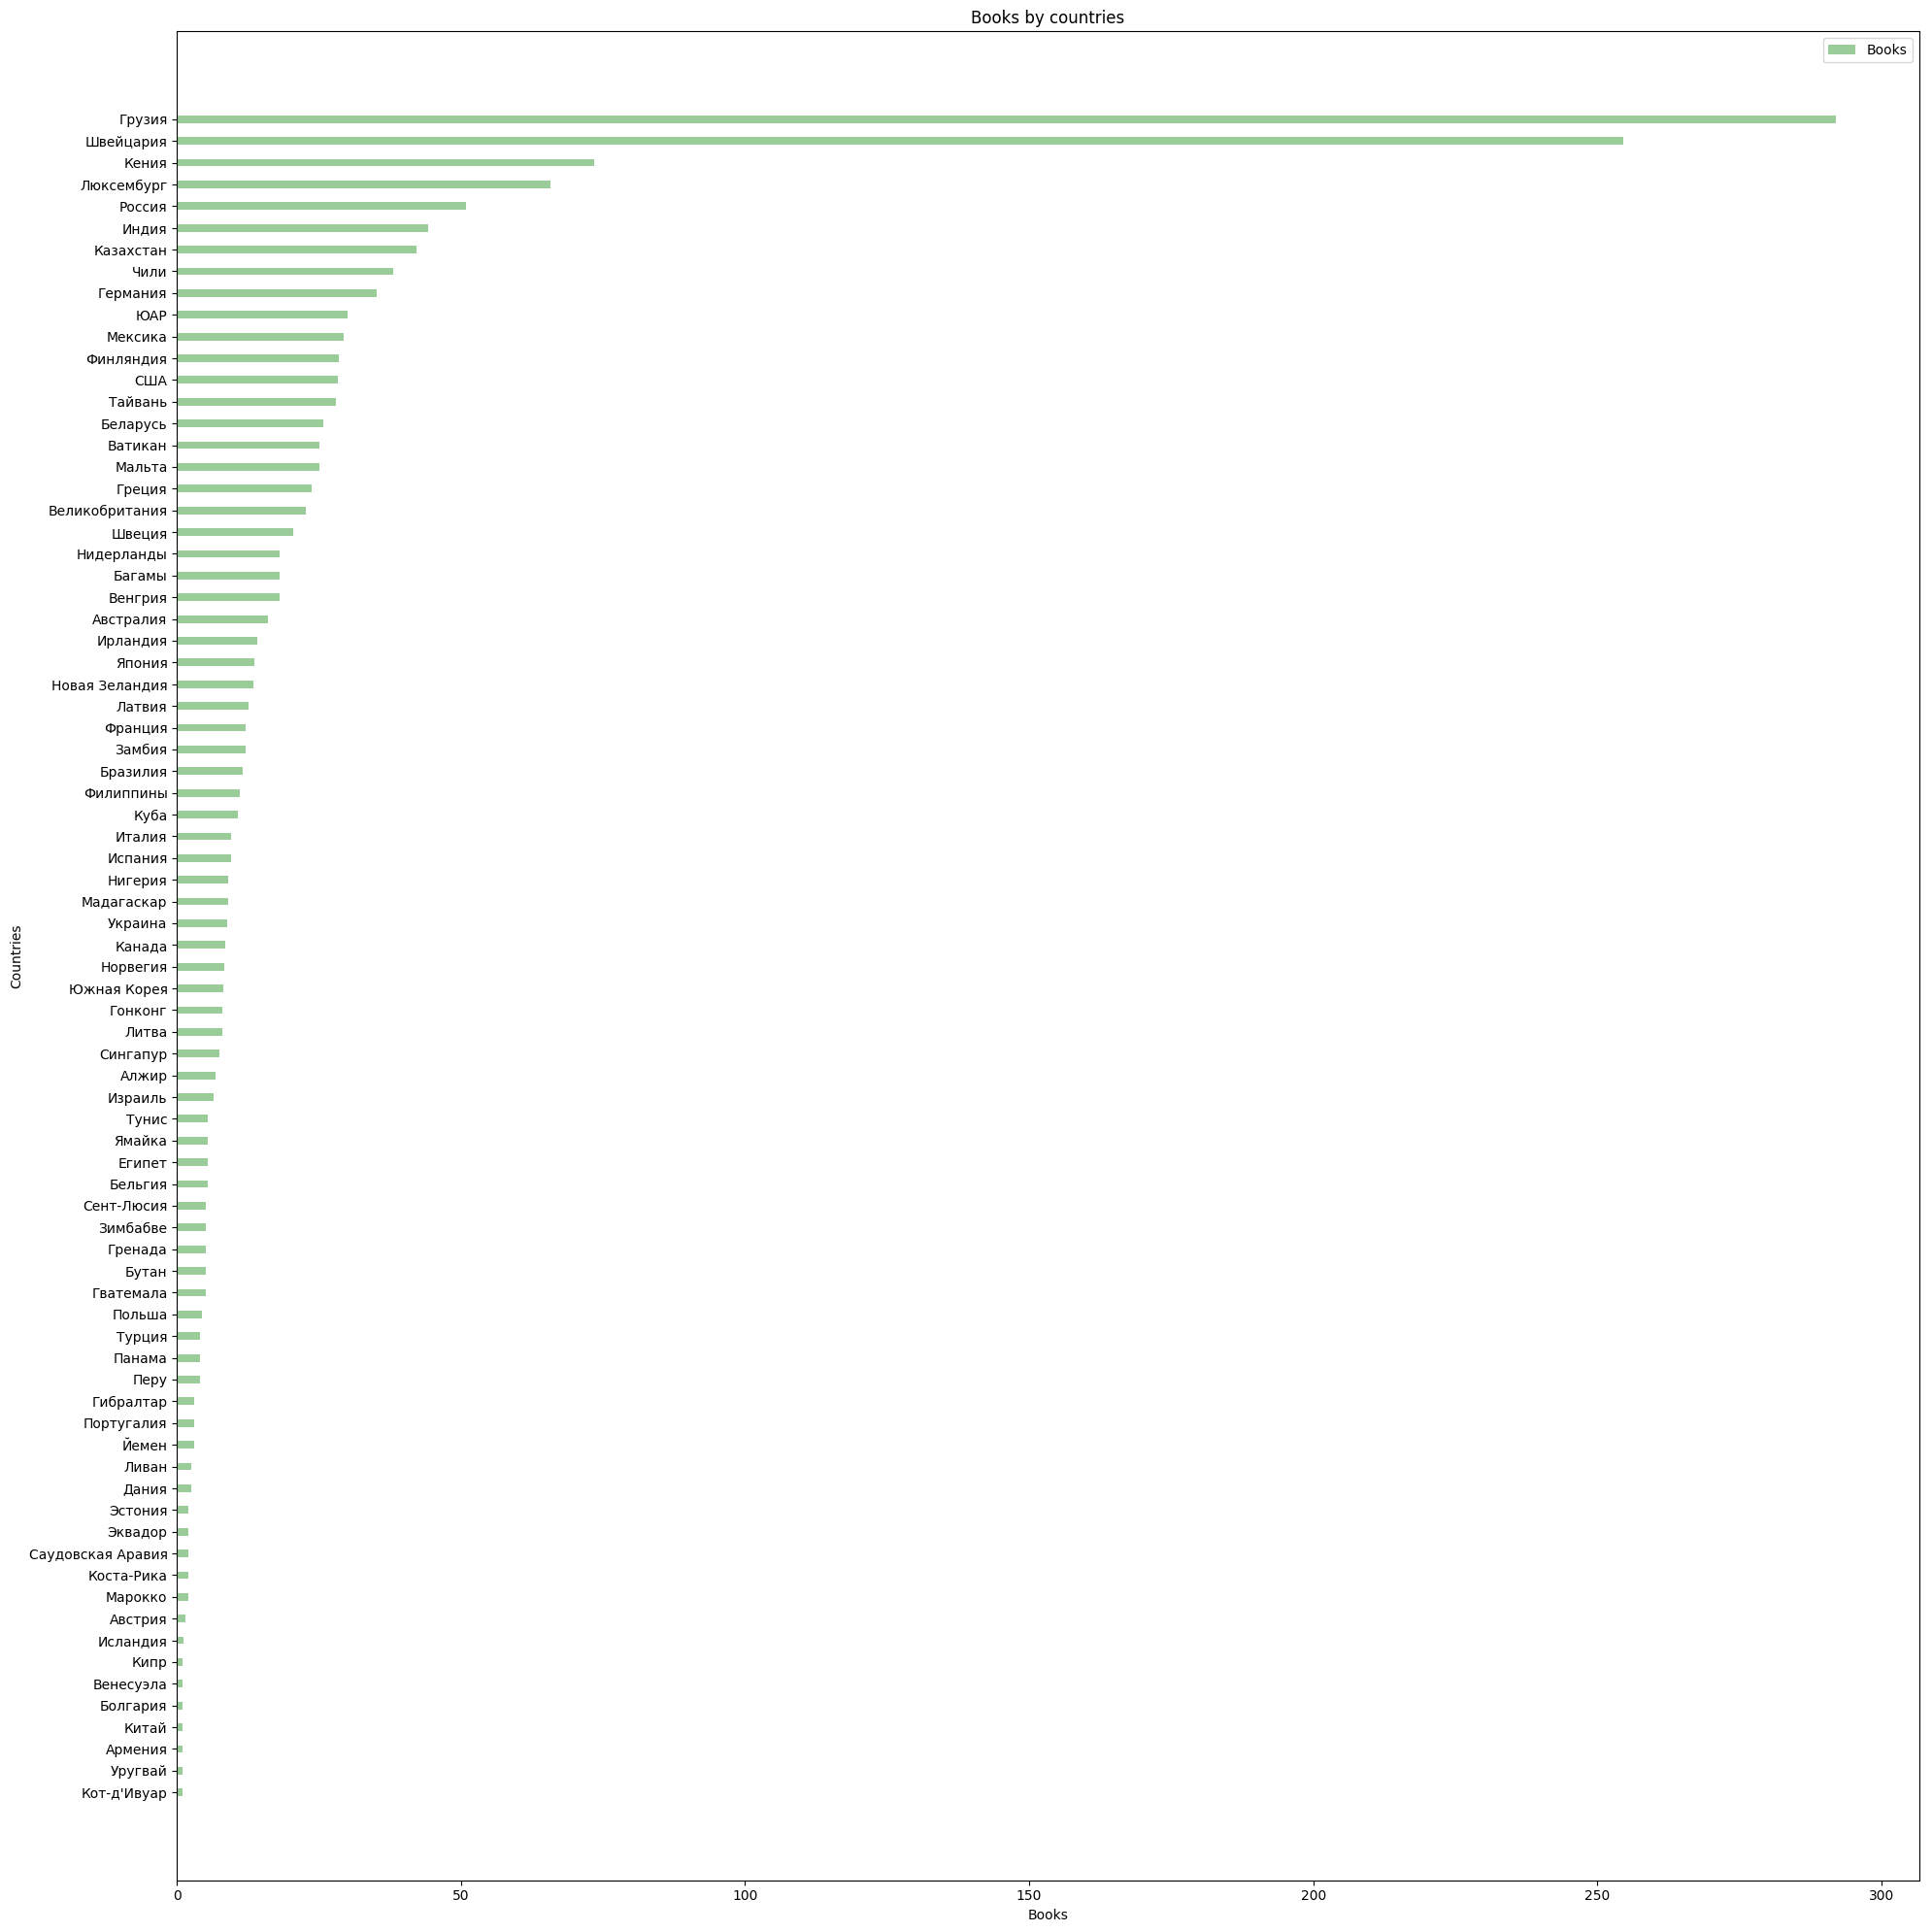

In [3]:
# Среднее количество книг авторов в зависимости от страны
grouped_books = merged[merged.num_books != 0].groupby('country', as_index=False)
data = grouped_books.mean().sort_values('num_books', ascending=False)

num_books = data['num_books'].tolist()
countries = data['country'].tolist()

plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(20,20)

y_pos = np.arange(len(data['num_books']))

ax.barh(y_pos, num_books, bar_width,
                alpha=opacity, color='g',
                label='Books')
ax.set_yticks(y_pos)
ax.set_xlabel('Books')
ax.set_ylabel('Countries')
ax.set_title('Books by countries')
ax.invert_yaxis()
ax.set_yticklabels(countries)
ax.legend()

fig.tight_layout()
plt.show()


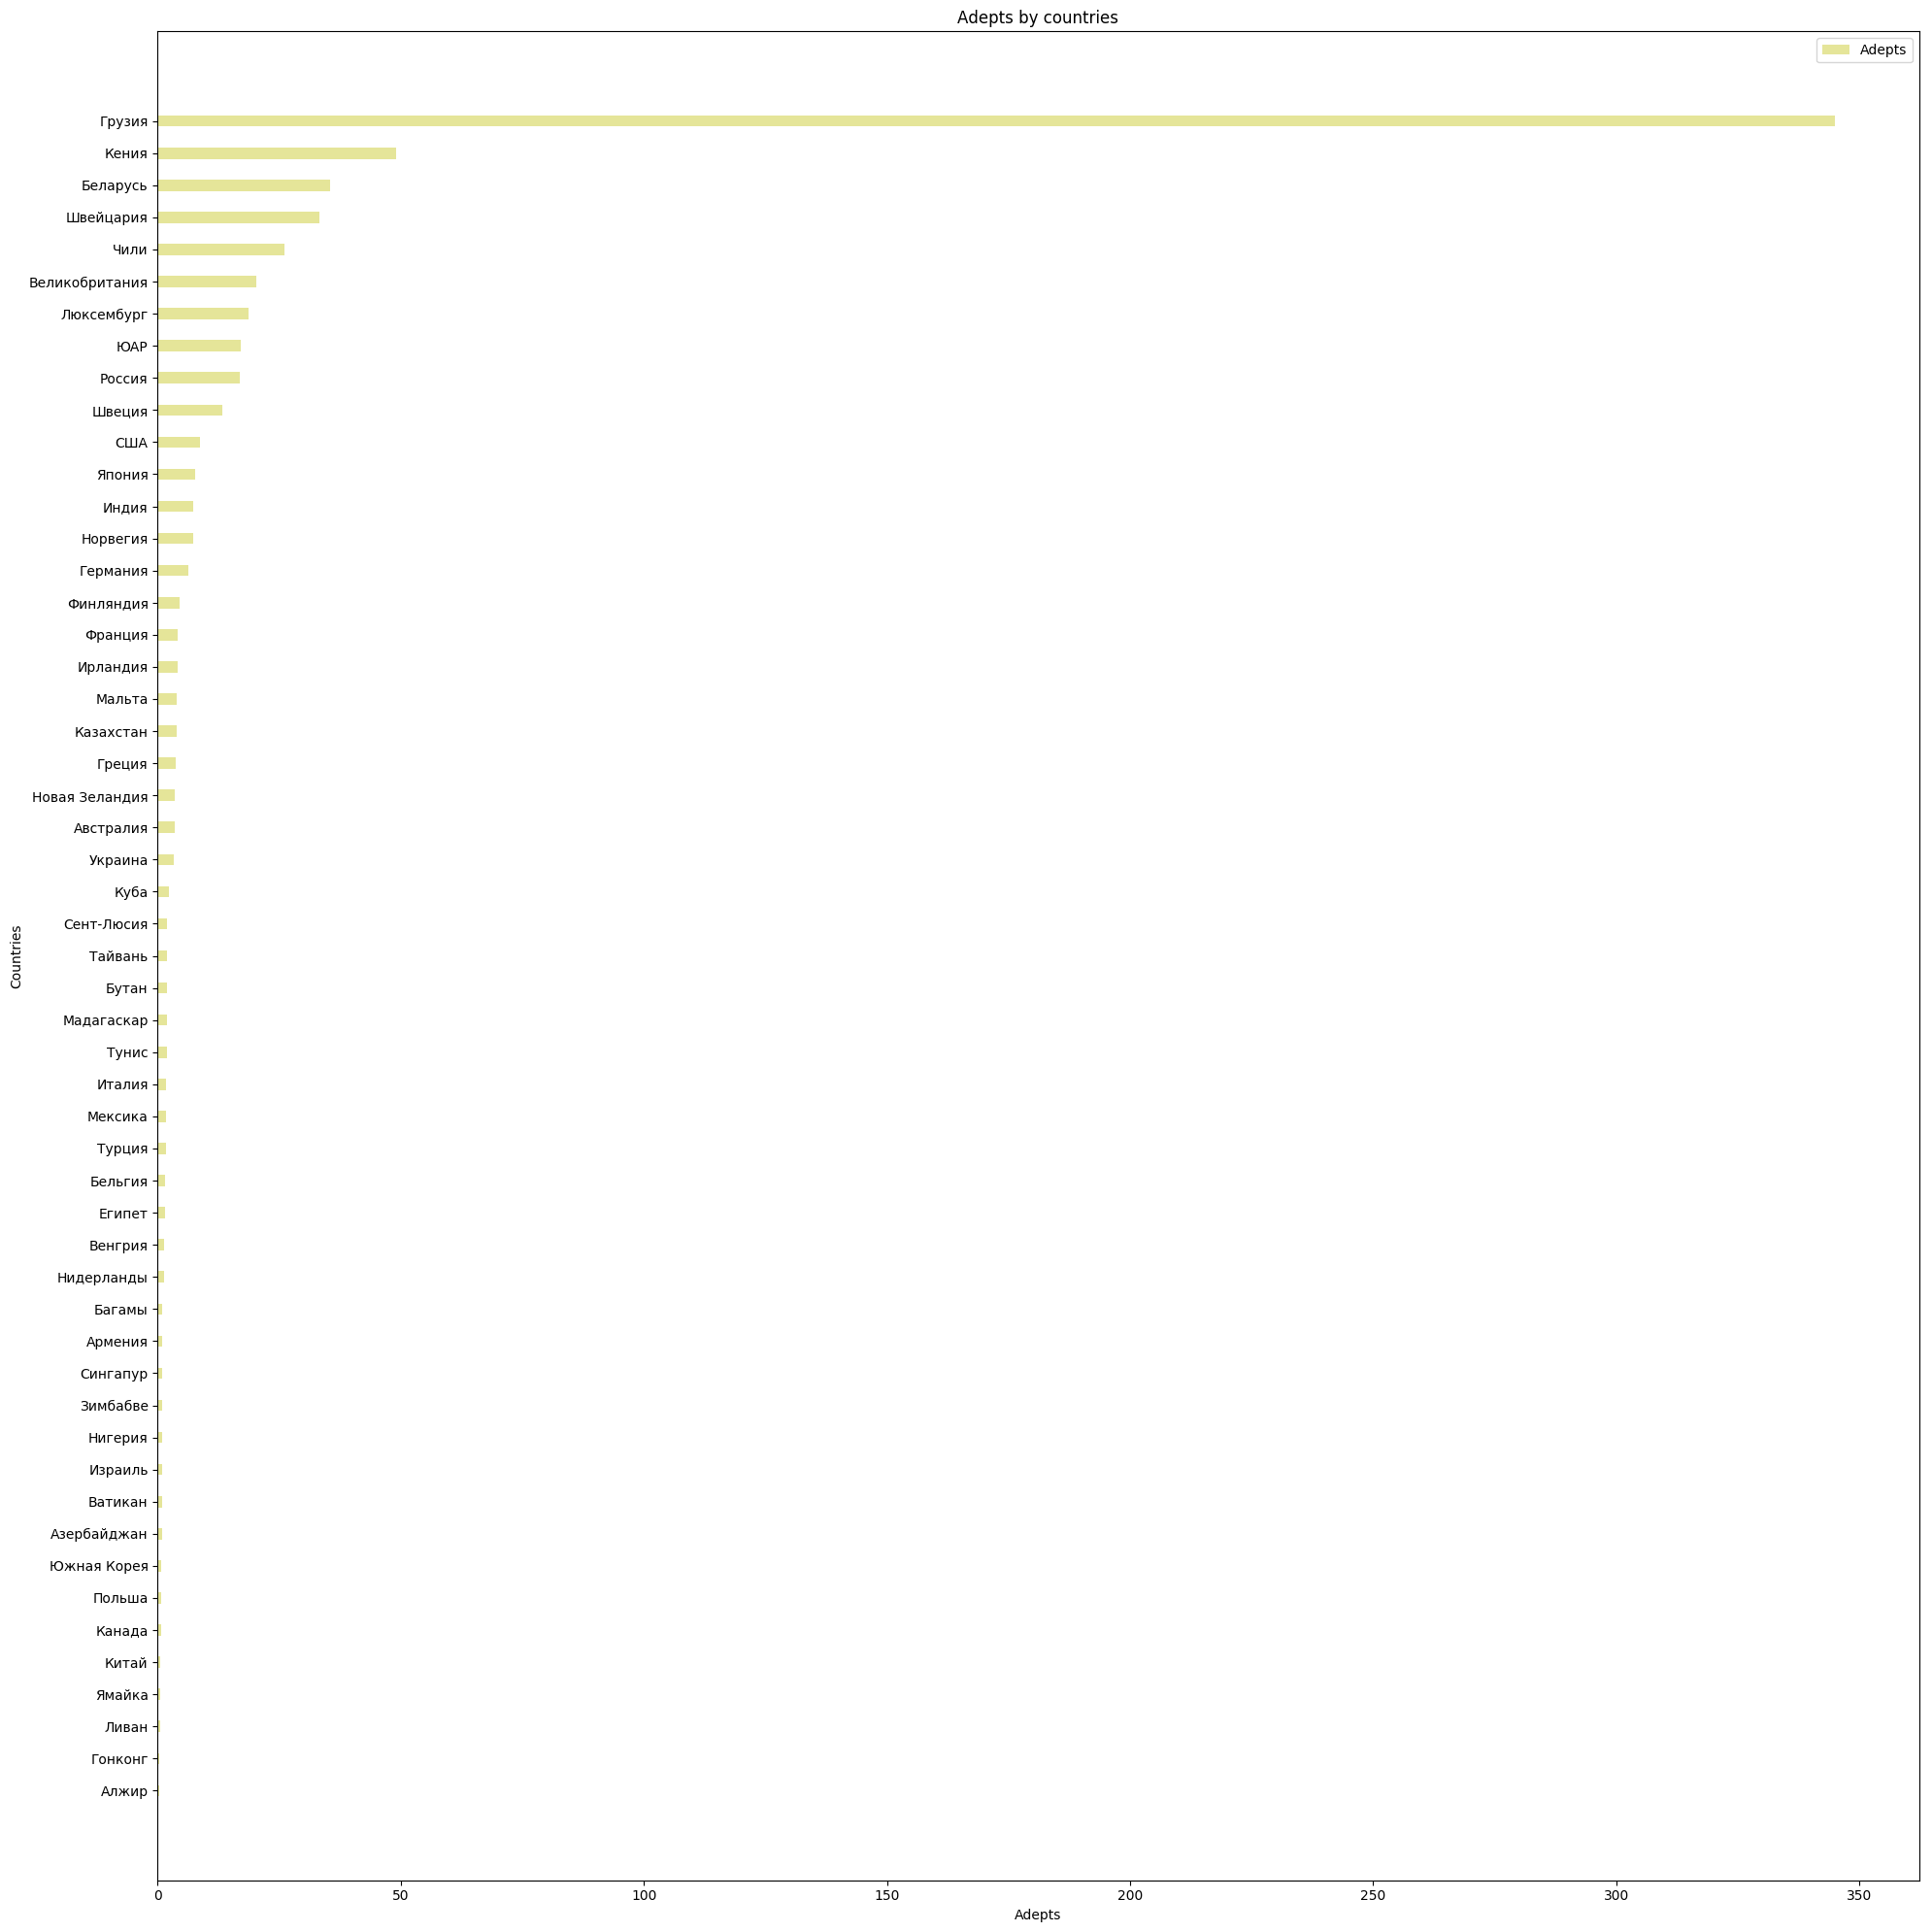

In [4]:
# Среднее количество почитателей в зависимости от страны
grouped_adepts = merged[merged.adepts != 0].groupby('country', as_index=False)
data = grouped_adepts.mean().sort_values('adepts', ascending=False)

adepts = data['adepts'].tolist()
countries = data['country'].tolist()

plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(20,20)

y_pos = np.arange(len(data['adepts']))

ax.barh(y_pos, adepts, bar_width,
                alpha=opacity, color='y',
                label='Adepts')
ax.set_yticks(y_pos)
ax.set_xlabel('Adepts')
ax.set_ylabel('Countries')
ax.set_title('Adepts by countries')
ax.invert_yaxis()
ax.set_yticklabels(countries)
ax.legend()

fig.tight_layout()
plt.show()

In [13]:
# Распределение первой и последней буквы имени в зависимости от страны
import seaborn as sns; sns.set()

uppercase = 'АБ'#ВГДЕЖЗИКЛМНОПРСТУФХЦЧШЩЭЮЯ'

names = merged.groupby(['country', 'name'], as_index=False)

df = pd.DataFrame({'country': [], 'letter': [], 'frequency_first': [], 'frequency_last': []})

for groupName, groupLabels in names.groups.items():
    group = names.get_group(groupName)

    count = group.shape[0]
    
    for letter in uppercase:
        countFirst = group[group.name.str.startswith(letter)].count()['name']
        countLast = group[group.name.str.endswith(str.lower(letter))].count()['name']

        df = df.append(pd.DataFrame({
            'country': group['country'],
            'letter': letter,
            'frequency_first': countFirst / count * 100,
            'frequency_last': countLast / count * 100}))
print(df)
df1 = df.pivot("letter", "country", "frequency_first")
df2 = df.pivot("letter", "country", "frequency_last")

ax1 = sns.heatmap(df1)
ax2 = sns.heatmap(df2)

KeyError: 'name'

In [ ]:
# Есть ли зависимость между возрастом и количеством произведений
fig, ax1 = plt.subplots(1, 1, figsize=(12,8))
ax1.plot(dataframe['lifespan'], dataframe['num_books'], 'o')

In [ ]:
# Есть ли корреляция между именем и продолжительностью жизни